# Neural Networks

#### 210503H                           
#### I.P.D.D.Rajapaksha

In [6]:
!pip install torch
!pip install torchvision



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 1.6/1.6 MB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Listing 1

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/20, Loss: 0.9769290246963501
Epoch 2/20, Loss: 0.9498206155896187
Epoch 3/20, Loss: 0.9360823971033096
Epoch 4/20, Loss: 0.9275327330827713
Epoch 5/20, Loss: 0.9215981885194778
Epoch 6/20, Loss: 0.9171971751451492
Epoch 7/20, Loss: 0.9137861201167107
Epoch 8/20, Loss: 0.9110605976581574
Epoch 9/20, Loss: 0.9088332299590111
Epoch 10/20, Loss: 0.906981387257576
Epoch 11/20, Loss: 0.9054218543171882
Epoch 12/20, Loss: 0.9040946851372719
Epoch 13/20, Loss: 0.902956613600254
Epoch 14/20, Loss: 0.9019737314581872
Epoch 15/20, Loss: 0.901119857609272
Epoch 16/20, Loss: 0.900374957382679
Epoch 17/20, Loss: 0.8997224988341331
Epoch 18/20, Loss: 0.8991492050290107
Epoch 19/20, Loss: 0.8986438111066818
Epoch 20/20, Loss: 0.898197353899479


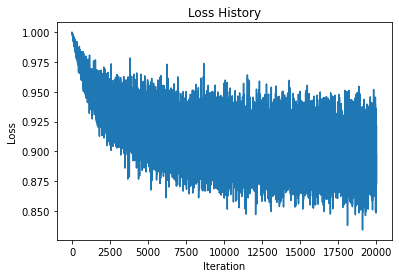

Training accuracy: 32.21%
Test accuracy: 32.42%


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


#### Add a middle layer with 100 nodes and a sigmoid activation

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 0.990307021200657
Epoch 2/20, Loss: 0.9740879511833191
Epoch 3/20, Loss: 0.9619989691376686
Epoch 4/20, Loss: 0.9528162389993667
Epoch 5/20, Loss: 0.9457215040922164
Epoch 6/20, Loss: 0.9401554464697838
Epoch 7/20, Loss: 0.9357281966209412
Epoch 8/20, Loss: 0.9321629281044006
Epoch 9/20, Loss: 0.9292596077919006
Epoch 10/20, Loss: 0.9268715609908104
Epoch 11/20, Loss: 0.9248895650506019
Epoch 12/20, Loss: 0.923231132030487
Epoch 13/20, Loss: 0.9218332878947259
Epoch 14/20, Loss: 0.9206473633646965
Epoch 15/20, Loss: 0.9196352431178093
Epoch 16/20, Loss: 0.9187668538093567
Epoch 17/20, Loss: 0.9180182052254677
Epoch 18/20, Loss: 0.91737002825737
Epoch 19/20, Loss: 0.9168066415190697
Epoch 20/20, Loss: 0.9163152393102646


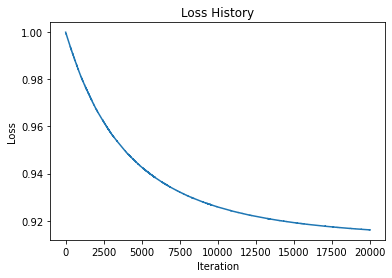

Training accuracy: 10.00%
Test accuracy: 10.00%


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size
H = 100  # Middle layer size
K = 10   # Output size
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to middle layer
b1 = torch.zeros(H)             # Biases for middle layer
w2 = torch.randn(H, K) * std     # Weights for middle layer to output
b2 = torch.zeros(K)              # Biases for output layer

# Hyperparameters
iterations = 20
lr = 2e-6
lr_decay = 0.9
reg = 0
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        h = x_train.mm(w1) + b1  # Middle layer activation
        h = torch.sigmoid(h)     # Sigmoid activation
        y_pred = h.mm(w2) + b2   # Output layer activation

        # Loss calculation
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dh = dy_pred.mm(w2.t()) * h * (1 - h)  # Backprop through sigmoid

        # Gradient calculation
        dw2 = h.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dw1 = x_train.t().mm(dh) + reg * w1
        db1 = dh.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden_layer.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden_layer = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden_layer.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


#### Use cross-entropy loss   with 20 epoch

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/20, Loss: 2.035644517660141
Epoch 2/20, Loss: 1.7792624702453614
Epoch 3/20, Loss: 1.6958895936012268
Epoch 4/20, Loss: 1.6459104956388473
Epoch 5/20, Loss: 1.6047491332292556
Epoch 6/20, Loss: 1.5700959120988847
Epoch 7/20, Loss: 1.5398142058849336
Epoch 8/20, Loss: 1.5121745722293853
Epoch 9/20, Loss: 1.4881883240938187
Epoch 10/20, Loss: 1.4655946946144105
Epoch 11/20, Loss: 1.4467523118257524
Epoch 12/20, Loss: 1.429205754339695
Epoch 13/20, Loss: 1.4134820518493652
Epoch 14/20, Loss: 1.3986970767378808
Epoch 15/20, Loss: 1.3864821065068245
Epoch 16/20, Loss: 1.3748671533465386
Epoch 17/20, Loss: 1.364326158285141
Epoch 18/20, Loss: 1.3555710869431497
Epoch 19/20, Loss: 1.347066624879837
Epoch 20/20, Loss: 1.3397217035293578


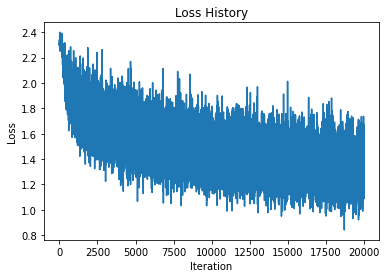

Training accuracy: 54.60%
Test accuracy: 49.20%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, 100) * std  # First layer (input to middle)
b1 = torch.zeros(100)

w2 = torch.randn(100, K) * std  # Second layer (middle to output)
b2 = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 0.1  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 1e-5  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)  # Middle layer with sigmoid activation
        y_pred = hidden.mm(w2) + b2  # Output layer (no activation here)

        # Loss calculation (Cross-Entropy Loss with manual softmax)
        softmax = torch.softmax(y_pred, dim=1)
        loss = -torch.sum(torch.log(softmax[range(Ntr), labels])) / Ntr
        loss += reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))  # Add regularization
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = torch.zeros_like(y_pred)
        dy_pred.scatter_(1, labels.unsqueeze(1), -1)  # Set gradient for correct class
        dy_pred += softmax                            # Add probability of each class
        dy_pred /= Ntr                                # Scale by batch size

        # Compute gradients for w2 and b2
        dw2 = hidden.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        # Compute gradients for w1 and b1
        dh = dy_pred.mm(w2.t())                      # Propagate gradient back to hidden layer
        dh_sigmoid = hidden * (1 - hidden) * dh      # Apply derivative of sigmoid function
        dw1 = x_train.t().mm(dh_sigmoid) + reg * w1
        db1 = dh_sigmoid.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


#### Run the network for 10 epochs

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.030634127855301
Epoch 2/10, Loss: 1.7801530313491822
Epoch 3/10, Loss: 1.701740774154663
Epoch 4/10, Loss: 1.6531034311056136
Epoch 5/10, Loss: 1.613915279507637
Epoch 6/10, Loss: 1.5796533674001694
Epoch 7/10, Loss: 1.5503036148548126
Epoch 8/10, Loss: 1.5226524913311004
Epoch 9/10, Loss: 1.4994436111450196
Epoch 10/10, Loss: 1.4781477649211883


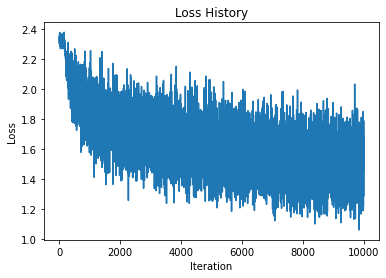

Training accuracy: 50.30%
Test accuracy: 46.67%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, 100) * std  # First layer (input to middle)
b1 = torch.zeros(100)

w2 = torch.randn(100, K) * std  # Second layer (middle to output)
b2 = torch.zeros(K)

# Hyperparameters
iterations = 10
lr = 0.1  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 1e-5  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)  # Middle layer with sigmoid activation
        y_pred = hidden.mm(w2) + b2  # Output layer (no activation here)

        # Loss calculation (Cross-Entropy Loss with manual softmax)
        softmax = torch.softmax(y_pred, dim=1)
        loss = -torch.sum(torch.log(softmax[range(Ntr), labels])) / Ntr
        loss += reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))  # Add regularization
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = torch.zeros_like(y_pred)
        dy_pred.scatter_(1, labels.unsqueeze(1), -1)  # Set gradient for correct class
        dy_pred += softmax                            # Add probability of each class
        dy_pred /= Ntr                                # Scale by batch size

        # Compute gradients for w2 and b2
        dw2 = hidden.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        # Compute gradients for w1 and b1
        dh = dy_pred.mm(w2.t())                      # Propagate gradient back to hidden layer
        dh_sigmoid = hidden * (1 - hidden) * dh      # Apply derivative of sigmoid function
        dw1 = x_train.t().mm(dh_sigmoid) + reg * w1
        db1 = dh_sigmoid.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


asdsadsad

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch [1/10], Loss: 0.4634, Train Accuracy: 85.56%, Test Accuracy: 97.89%
Epoch [2/10], Loss: 0.0634, Train Accuracy: 98.04%, Test Accuracy: 98.38%
Epoch [3/10], Loss: 0.0442, Train Accuracy: 98.65%, Test Accuracy: 98.76%
Epoch [4/10], Loss: 0.0356, Train Accuracy: 98.85%, Test Accuracy: 98.68%
Epoch [5/10], Loss: 0.0293, Train Accuracy: 99.08%, Test Accuracy: 98.68%
Epoch [6/10], Loss: 0.0236, Train Accuracy: 99.27%, Test Accuracy: 98.85%
Epoch [7/10], Loss: 0.0208, Train Accuracy: 99.30%, Test Accuracy: 99.01%
Epoch [8/10], Loss: 0.0166, Train Accuracy: 99.46%, Test Accuracy: 98.92%
Epoch [9/10], Loss: 0.0150, Train Accuracy: 99.52%, Test Accuracy: 98.84%
Epoch [10/10], Loss: 0.0121, Train Accuracy: 99.63%, Test Accuracy: 99.10%


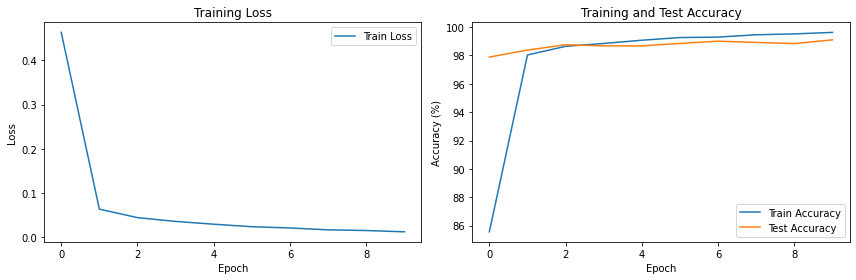

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Define the LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 2. Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# 3. Model, Loss, and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 4. Training the Model
epochs = 10
train_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Track loss
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_loss = running_loss / total_train
    train_accuracy = 100 * correct_train / total_train
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    
    # Test the Model
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    test_accuracy_history.append(test_accuracy)
    
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

# 5. Plotting Training Loss and Accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


####  Training and test accuracies after 10 epochs.

In [4]:
# Overall training accuracy
overall_train_accuracy = train_accuracy_history[-1]  
# Overall test accuracy
overall_test_accuracy = test_accuracy_history[-1] 

print(f"Training accuracy: {overall_train_accuracy:.2f}%")
print(f"Test accuracy: {overall_test_accuracy:.2f}%")


Training accuracy: 99.63%
Test accuracy: 99.10%


### Implementation of ResNet-18

In [2]:
pip install torch torchvision matplotlib


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler
from tempfile import TemporaryDirectory

# Data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Dataset paths and loaders
data_dir = 'hymenoptera_data'
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize accuracy history lists for validation accuracy tracking
fine_tuning_val_acc_history = []
feature_extraction_val_acc_history = []


#### Training Function

In [25]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    # Temporary directory for best model checkpoint
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')
        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_corrects = 0

                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # Log validation accuracy based on mode
                if phase == 'val':
                    if fine_tuning_mode:
                        fine_tuning_val_acc_history.append(epoch_acc.item())
                    elif feature_extraction_mode:
                        feature_extraction_val_acc_history.append(epoch_acc.item())

                # Save best model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)
            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        model.load_state_dict(torch.load(best_model_params_path))
    return model


#### Fine-Tuning the Pre-trained ResNet18 Model

In [26]:
fine_tuning_mode = True
feature_extraction_mode = False

model_ft = torchvision.models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Train model
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)


Epoch 0/9
----------
train Loss: 0.5855 Acc: 0.6885
val Loss: 0.2036 Acc: 0.9346

Epoch 1/9
----------
train Loss: 0.5121 Acc: 0.8033
val Loss: 0.2365 Acc: 0.9477

Epoch 2/9
----------
train Loss: 0.5321 Acc: 0.7869
val Loss: 0.5668 Acc: 0.8105

Epoch 3/9
----------
train Loss: 0.6171 Acc: 0.7418
val Loss: 0.2512 Acc: 0.8889

Epoch 4/9
----------
train Loss: 0.5862 Acc: 0.8156
val Loss: 0.2261 Acc: 0.9150

Epoch 5/9
----------
train Loss: 0.6559 Acc: 0.7828
val Loss: 0.3476 Acc: 0.8758

Epoch 6/9
----------
train Loss: 0.5712 Acc: 0.7705
val Loss: 0.5452 Acc: 0.7712

Epoch 7/9
----------
train Loss: 0.6220 Acc: 0.7828
val Loss: 0.4243 Acc: 0.8497

Epoch 8/9
----------
train Loss: 0.4547 Acc: 0.8402
val Loss: 0.9263 Acc: 0.7843

Epoch 9/9
----------
train Loss: 0.4475 Acc: 0.8402
val Loss: 0.5563 Acc: 0.8039

Training complete in 13m 13s
Best val Acc: 0.947712


C:\Users\User\AppData\Local\Temp\ipykernel_20272\2086816475.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


#### Using the Pre-trained ResNet18 Model as a Feature Extractor

In [28]:
# Set mode for feature extraction
fine_tuning_mode = False
feature_extraction_mode = True

model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))

model_conv = model_conv.to(device)
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)


Epoch 0/9
----------
train Loss: 0.6843 Acc: 0.6393
val Loss: 0.2345 Acc: 0.9216

Epoch 1/9
----------
train Loss: 0.4802 Acc: 0.7582
val Loss: 0.2000 Acc: 0.9216

Epoch 2/9
----------
train Loss: 0.4734 Acc: 0.7951
val Loss: 0.1794 Acc: 0.9412

Epoch 3/9
----------
train Loss: 0.4857 Acc: 0.7705
val Loss: 0.1954 Acc: 0.9346

Epoch 4/9
----------
train Loss: 0.4556 Acc: 0.7992
val Loss: 0.1904 Acc: 0.9346

Epoch 5/9
----------
train Loss: 0.4232 Acc: 0.8074
val Loss: 0.2991 Acc: 0.8562

Epoch 6/9
----------
train Loss: 0.7190 Acc: 0.7377
val Loss: 0.2080 Acc: 0.9346

Epoch 7/9
----------
train Loss: 0.2917 Acc: 0.8607
val Loss: 0.2342 Acc: 0.9346

Epoch 8/9
----------
train Loss: 0.3896 Acc: 0.8361
val Loss: 0.2113 Acc: 0.9216

Epoch 9/9
----------
train Loss: 0.4120 Acc: 0.8197
val Loss: 0.2266 Acc: 0.9346

Training complete in 6m 22s
Best val Acc: 0.941176


C:\Users\User\AppData\Local\Temp\ipykernel_20272\2086816475.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


#### Plotting the Validation Accuracy Comparison

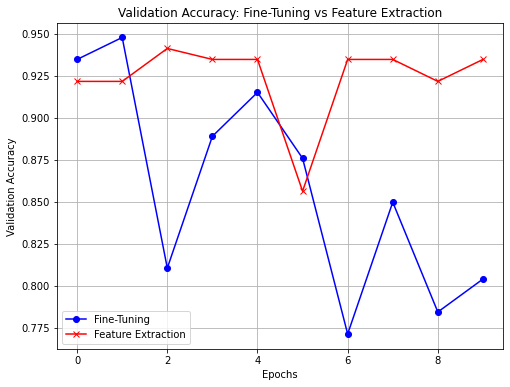

In [29]:
# Plot validation accuracy for fine-tuning vs. feature extraction
plt.figure(figsize=(8, 6))
plt.plot(fine_tuning_val_acc_history, label='Fine-Tuning', color='blue', marker='o')
plt.plot(feature_extraction_val_acc_history, label='Feature Extraction', color='red', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy: Fine-Tuning vs Feature Extraction')
plt.legend()
plt.grid(True)
plt.show()


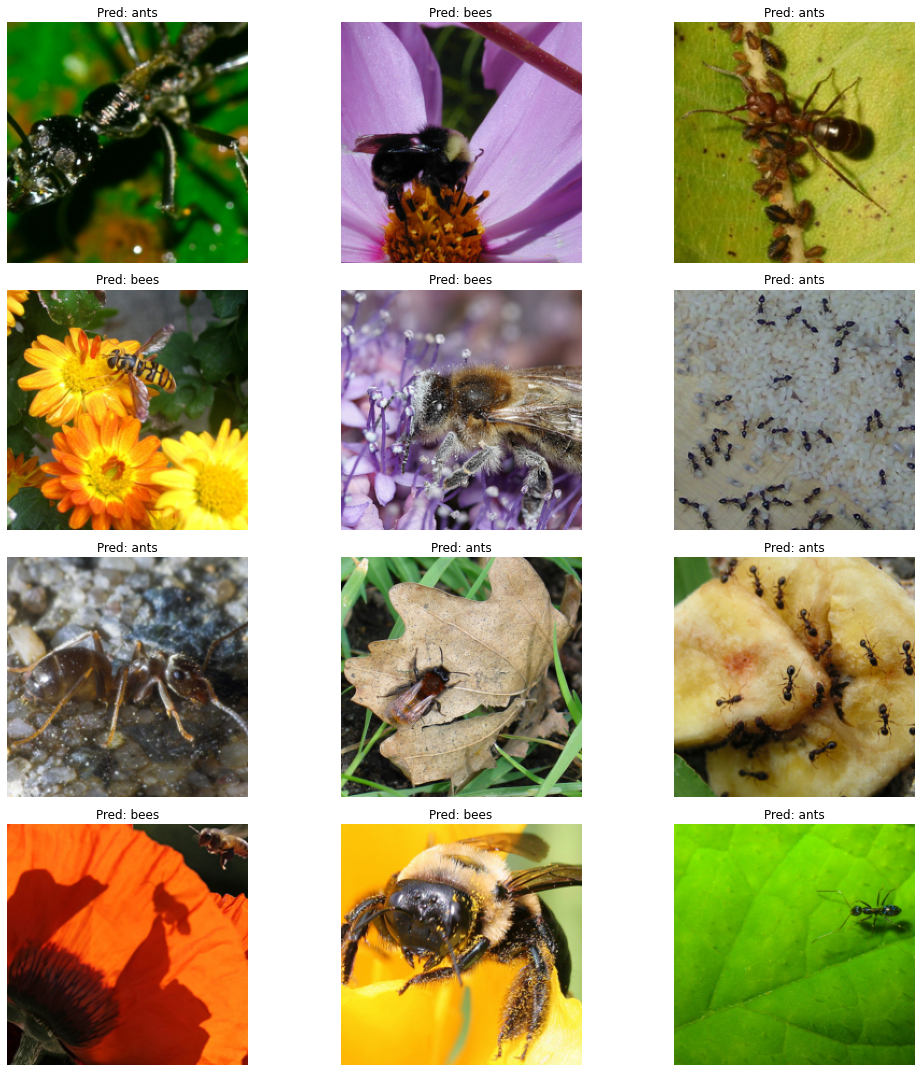

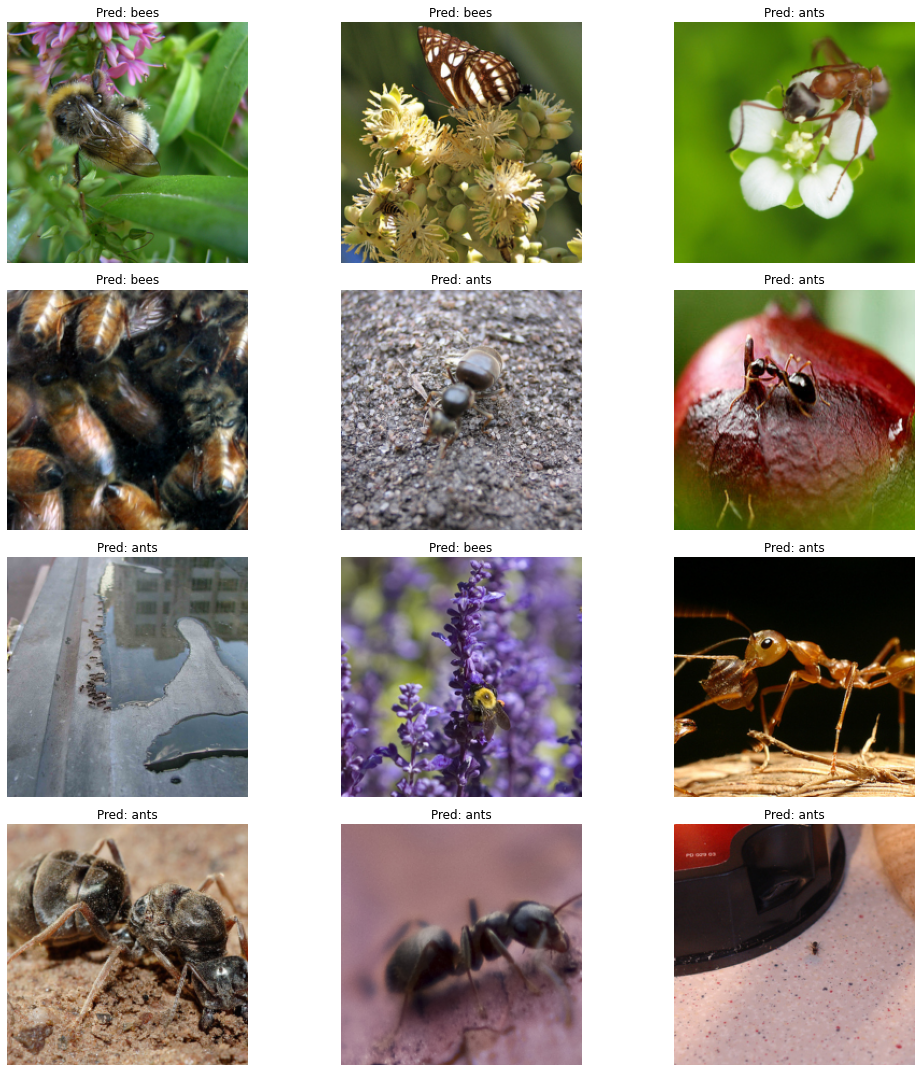

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1) 

    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')  

def visualize_model(model, num_images=12):
    was_training = model.training
    model.eval()  
    images_so_far = 0
    fig = plt.figure(figsize=(15, 15))  

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(4, 3, images_so_far)  
                ax.axis('off')  
                ax.set_title(f'Pred: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])  
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    plt.tight_layout()  
                    return
        
        model.train(mode=was_training) 

visualize_model(model_ft)
visualize_model(model_conv)

plt.ioff()  
plt.show()
